In [150]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [151]:
df1 = pd.read_csv(r'./data/sales.csv', index_col=0)
df2 = pd.read_csv(r'./data/data_insta.csv', index_col=0)

In [152]:
df1.head()

,Paid at,Total,year,month,week,days,date
7698,2020-10-05 12:28:48+05:30,310.0,2020,10,41,5,2020-10-05
7692,2020-12-01 12:55:58+05:30,2600.0,2020,12,49,1,2020-12-01
7687,2020-10-11 15:01:55+05:30,1920.0,2020,10,41,11,2020-10-11
7686,2020-12-01 13:41:32+05:30,640.0,2020,12,49,1,2020-12-01
7684,2020-10-12 22:30:12+05:30,350.0,2020,10,42,12,2020-10-12


In [153]:
df2.head()

,Date,Bill Amount
0,24/08/2019,1200.0
1,24/08/2019,1300.0
2,26/08/2019,2200.0
3,26/08/2019,500.0
4,26/08/2019,300.0


In [154]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'].dt.strftime('%Y-%m-%d')

C:\Users\Asus\anaconda3\envs\deepL\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/08/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Asus\anaconda3\envs\deepL\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/08/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Asus\anaconda3\envs\deepL\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Asus\anaconda3\envs\deepL\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/08/2019' in DD/

0      2019-08-24
1      2019-08-24
2      2019-08-26
3      2019-08-26
4      2019-08-26
          ...    
766    2020-04-12
767    2020-04-12
768    2020-05-12
769    2020-07-12
770    2020-07-12
Name: Date, Length: 771, dtype: object

In [155]:
df2.head()

,Date,Bill Amount
0,2019-08-24,1200.0
1,2019-08-24,1300.0
2,2019-08-26,2200.0
3,2019-08-26,500.0
4,2019-08-26,300.0


In [156]:
df2['week'] = df2['Date'].dt.week

C:\Users\Asus\AppData\Local\Temp\ipykernel_18312\454825030.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['week'] = df2['Date'].dt.week


In [157]:
df2['month'] = df2['Date'].dt.month

In [158]:
df2['days'] = df2['Date'].dt.day

In [159]:
df2.head()

,Date,Bill Amount,week,month,days
0,2019-08-24,1200.0,34,8,24
1,2019-08-24,1300.0,34,8,24
2,2019-08-26,2200.0,35,8,26
3,2019-08-26,500.0,35,8,26
4,2019-08-26,300.0,35,8,26


In [160]:
df1 = df1.drop(['Paid at','month','days'], axis = 1)
#Date	Bill Amount	week	month	days

In [161]:
df1 = df1.rename(columns={'date':'Date'})

In [162]:
df2 = df2.drop(['month','days'], axis = 1)
df2['year'] = df2['Date'].dt.year
df2 = df2.rename(columns={'Bill Amount':'Total'})


In [163]:
df2.head()

,Date,Total,week,year
0,2019-08-24,1200.0,34,2019
1,2019-08-24,1300.0,34,2019
2,2019-08-26,2200.0,35,2019
3,2019-08-26,500.0,35,2019
4,2019-08-26,300.0,35,2019


In [164]:
df1.head()

,Total,year,week,Date
7698,310.0,2020,41,2020-10-05
7692,2600.0,2020,49,2020-12-01
7687,1920.0,2020,41,2020-10-11
7686,640.0,2020,49,2020-12-01
7684,350.0,2020,42,2020-10-12


In [165]:
sales = pd.concat([df2,df1])
sales.head()

,Date,Total,week,year
0,2019-08-24 00:00:00,1200.0,34,2019
1,2019-08-24 00:00:00,1300.0,34,2019
2,2019-08-26 00:00:00,2200.0,35,2019
3,2019-08-26 00:00:00,500.0,35,2019
4,2019-08-26 00:00:00,300.0,35,2019


In [166]:
sales = sales.drop(['week','year'], axis = 1)
sales.head()

,Date,Total
0,2019-08-24 00:00:00,1200.0
1,2019-08-24 00:00:00,1300.0
2,2019-08-26 00:00:00,2200.0
3,2019-08-26 00:00:00,500.0
4,2019-08-26 00:00:00,300.0


In [167]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales.head()

,Date,Total
0,2019-08-24,1200.0
1,2019-08-24,1300.0
2,2019-08-26,2200.0
3,2019-08-26,500.0
4,2019-08-26,300.0


In [168]:
sales['week'] = sales['Date'].dt.week
sales['year'] = sales['Date'].dt.year

C:\Users\Asus\AppData\Local\Temp\ipykernel_18312\1148555141.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sales['week'] = sales['Date'].dt.week


In [169]:
sales.head()

,Date,Total,week,year
0,2019-08-24,1200.0,34,2019
1,2019-08-24,1300.0,34,2019
2,2019-08-26,2200.0,35,2019
3,2019-08-26,500.0,35,2019
4,2019-08-26,300.0,35,2019


In [170]:
sales.shape

(5562, 4)

In [171]:
weekley_groupby = sales.groupby(by =['year','week']).sum()
weekley_groupby = pd.DataFrame(weekley_groupby)
weekley_groupby.reset_index(inplace=True)
weekley_groupby.head()

,year,week,Total
0,2019,1,37640.0
1,2019,2,19520.0
2,2019,6,1270.0
3,2019,7,2700.0
4,2019,10,3560.0


In [172]:
weekley_groupby.tail()

,year,week,Total
134,2022,3,54187.70
135,2022,4,54448.75
136,2022,5,85898.76
137,2022,6,39524.30
138,2022,52,8768.00


In [173]:
# adding a weeks col which contains continous week numbers 
weekley_groupby['weeks'] = np.arange(len(weekley_groupby))
weekley_groupby['weeks'] = weekley_groupby['weeks'] +1 
weekley_groupby.head()

,year,week,Total,weeks
0,2019,1,37640.0,1
1,2019,2,19520.0,2
2,2019,6,1270.0,3
3,2019,7,2700.0,4
4,2019,10,3560.0,5


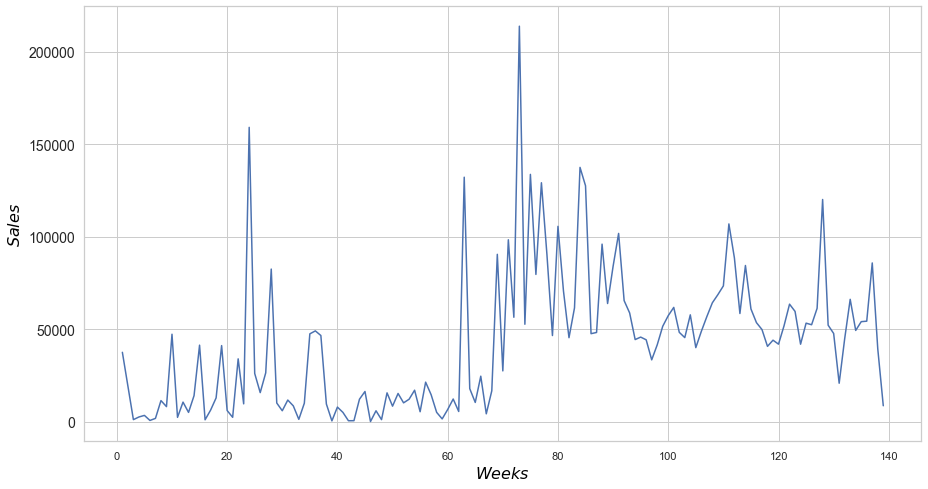

In [175]:
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
sns.lineplot(x = weekley_groupby.weeks, y = weekley_groupby.Total , ax = ax)  #sales[: int(len(sales)*0.8)].sales_norm
#sns.lineplot(x = np.arange(len(trainPredict)), y =trainPredict[:,0].tolist() , ax = ax)
plt.xlabel(r'$Weeks$', fontdict = font)
plt.ylabel(r'$Sales$ ', fontdict = font)
plt.yticks(fontsize = 14)
plt.show()

In [177]:
weekley_groupby.to_csv('./data/sales_full.csv')